# Bonus: Selective ControlNet on 2 frames with single prompt

## Setup

In [ ]:
!pip uninstall -y torchaudio xformers diffusers flax jax jaxlib numpy

!pip install xformers==0.0.16
!pip install diffusers==0.14.0
!pip install jax==0.4.8 jaxlib==0.4.7
!pip install numpy==1.24.4
!pip install transformers==4.27.3
!pip install accelerate==0.21.0
!pip install imageio==2.33
!pip install decord==0.6.0
!pip install opencv-python
!pip install einops==0.6.0
!pip install huggingface_hub==0.14.1
!pip install rembg
!pip install onnxruntime-gpu

#Clone repositories
!git clone https://github.com/Weifeng-Chen/control-a-video.git
!git clone https://github.com/Reouth/SelectiveControlNet.git


## Imports

In [39]:
%cd control-a-video
import sys
sys.path.append("/content/SelectiveControlNet")
sys.path.append("/content/control-a-video")

import os
import cv2
import numpy as np
from PIL import Image
from torchvision.transforms import ToTensor
from google.colab import files
import matplotlib.pyplot as plt


from SelectiveControlNet.src.video_utils import (
    extract_two_frames,
    frames_to_video,
    find_latest_output_video,
    save_video_frames
)

from SelectiveControlNet.src.masking import get_foreground_images

/content/control-a-video/control-a-video


##Preprocessing
Start by loading the input video, extract 2 frames, generate masks, and create video format (mp4) for input.


In [ ]:
uploaded = files.upload()
video_path = "bear.mp4"
frames = extract_two_frames(video_path, [0, 1])  # 2 frames
fg_masked = get_foreground_images(frames)

os.makedirs("masked_bear_frames", exist_ok=True)

for i, frame in enumerate(fg_masked):
    path = f"masked_bear_frames/frame_{i:04d}.png"
    frame.save(path)
    print(f"Saved: {path}")

frames_to_video(fg_masked, "masked_bear.mp4", fps=2) # Generate video format for 2 frames

Visualize frames and forground masks

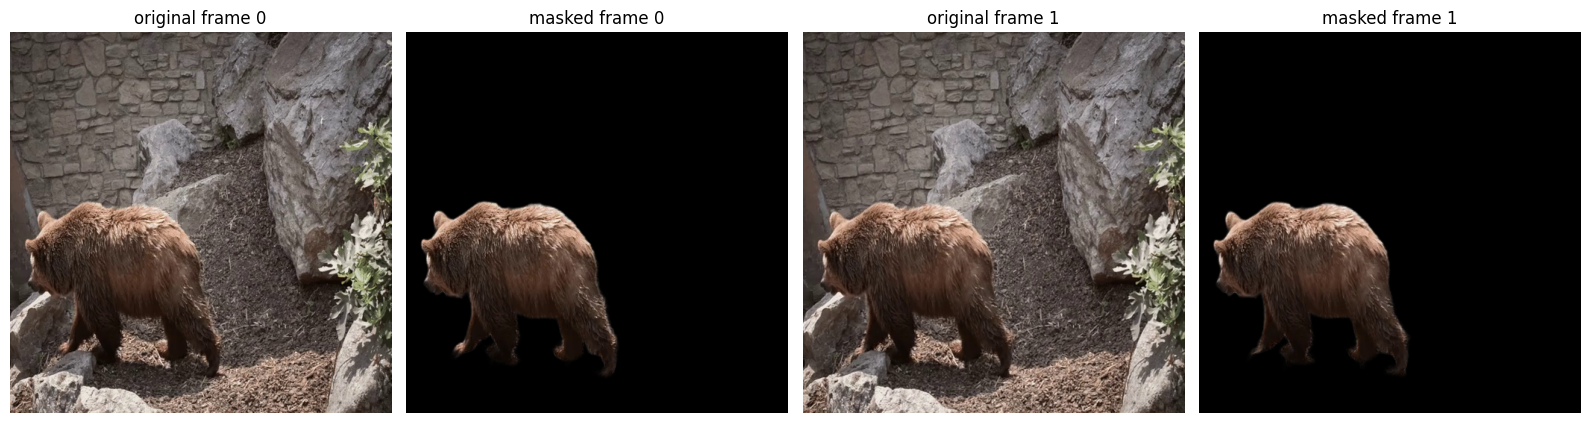

In [60]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
axes[0].imshow(frames[0]); axes[0].set_title("original frame 0")
axes[1].imshow(fg_masked[0]); axes[1].set_title("masked frame 0")
axes[2].imshow(frames[1]); axes[2].set_title("original frame 1")
axes[3].imshow(fg_masked[1]); axes[3].set_title("masked frame 1")
for ax in axes: ax.axis("off")
plt.tight_layout(); plt.show()


## Run Control-a-video
[github repo](https://github.com/Weifeng-Chen/control-a-video.git)

NOTE: In `inference.py`, to generate **frames** instead of a GIF, replace the last line of the code with the following:

```
from PIL import Image
import os

output_dir = "generated_frames"
os.makedirs(output_dir, exist_ok=True)

for idx, frame in enumerate(out):
    frame.save(os.path.join(output_dir, f"frame_{idx:02d}.png"))  # Saves each frame as a PNG
```



Run inference

In [ ]:


!python3 inference.py \
  --prompt "bear underwater, blue clothes, corals and fishes background" \
  --input_video masked_bear.mp4 \
  --control_mode canny \
  --num_sample_frames 2 \
  --each_sample_frame 2 \
  --sampling_rate 1 \
  --video_scale 1.0 \
  --init_noise_thres 0.2 \
  --inference_step 50 \
  --guidance_scale 8 \
  --height 512 \
  --width 512



Visualize Generated frames with forground mask

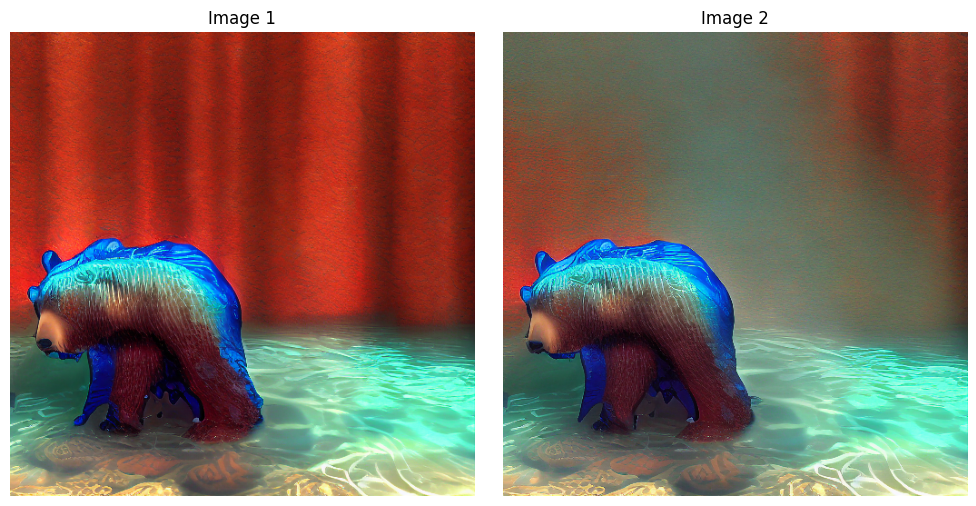

In [57]:
import matplotlib.pyplot as plt
from PIL import Image

# Replace with your image paths
image1_path = './generated_frames/frame_00.png'
image2_path = './generated_frames/frame_01.png'

# Load images
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image1); axes[0].set_title("Generated frame 1")
axes[1].imshow(image2); axes[1].set_title("Generated frame 2")

for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()
